In [ ]:
  import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi']= 250
sns.set_style('darkgrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/ToyotaCorolla - MLR.csv")
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [ ]:
df.tail()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015
1435,6950,76,1,Petrol,110,0,1600,5,4,5,1114


In [ ]:
df.head(100)

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
95,19950,17,30351,Diesel,90,0,1995,3,4,5,1260
96,15950,19,29435,Petrol,97,0,1400,3,4,5,1100
97,15950,19,25948,Petrol,97,0,1400,3,4,5,1100
98,18750,11,24500,Petrol,110,0,1600,3,4,5,1120


In [ ]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [ ]:
df.shape

(1436, 11)

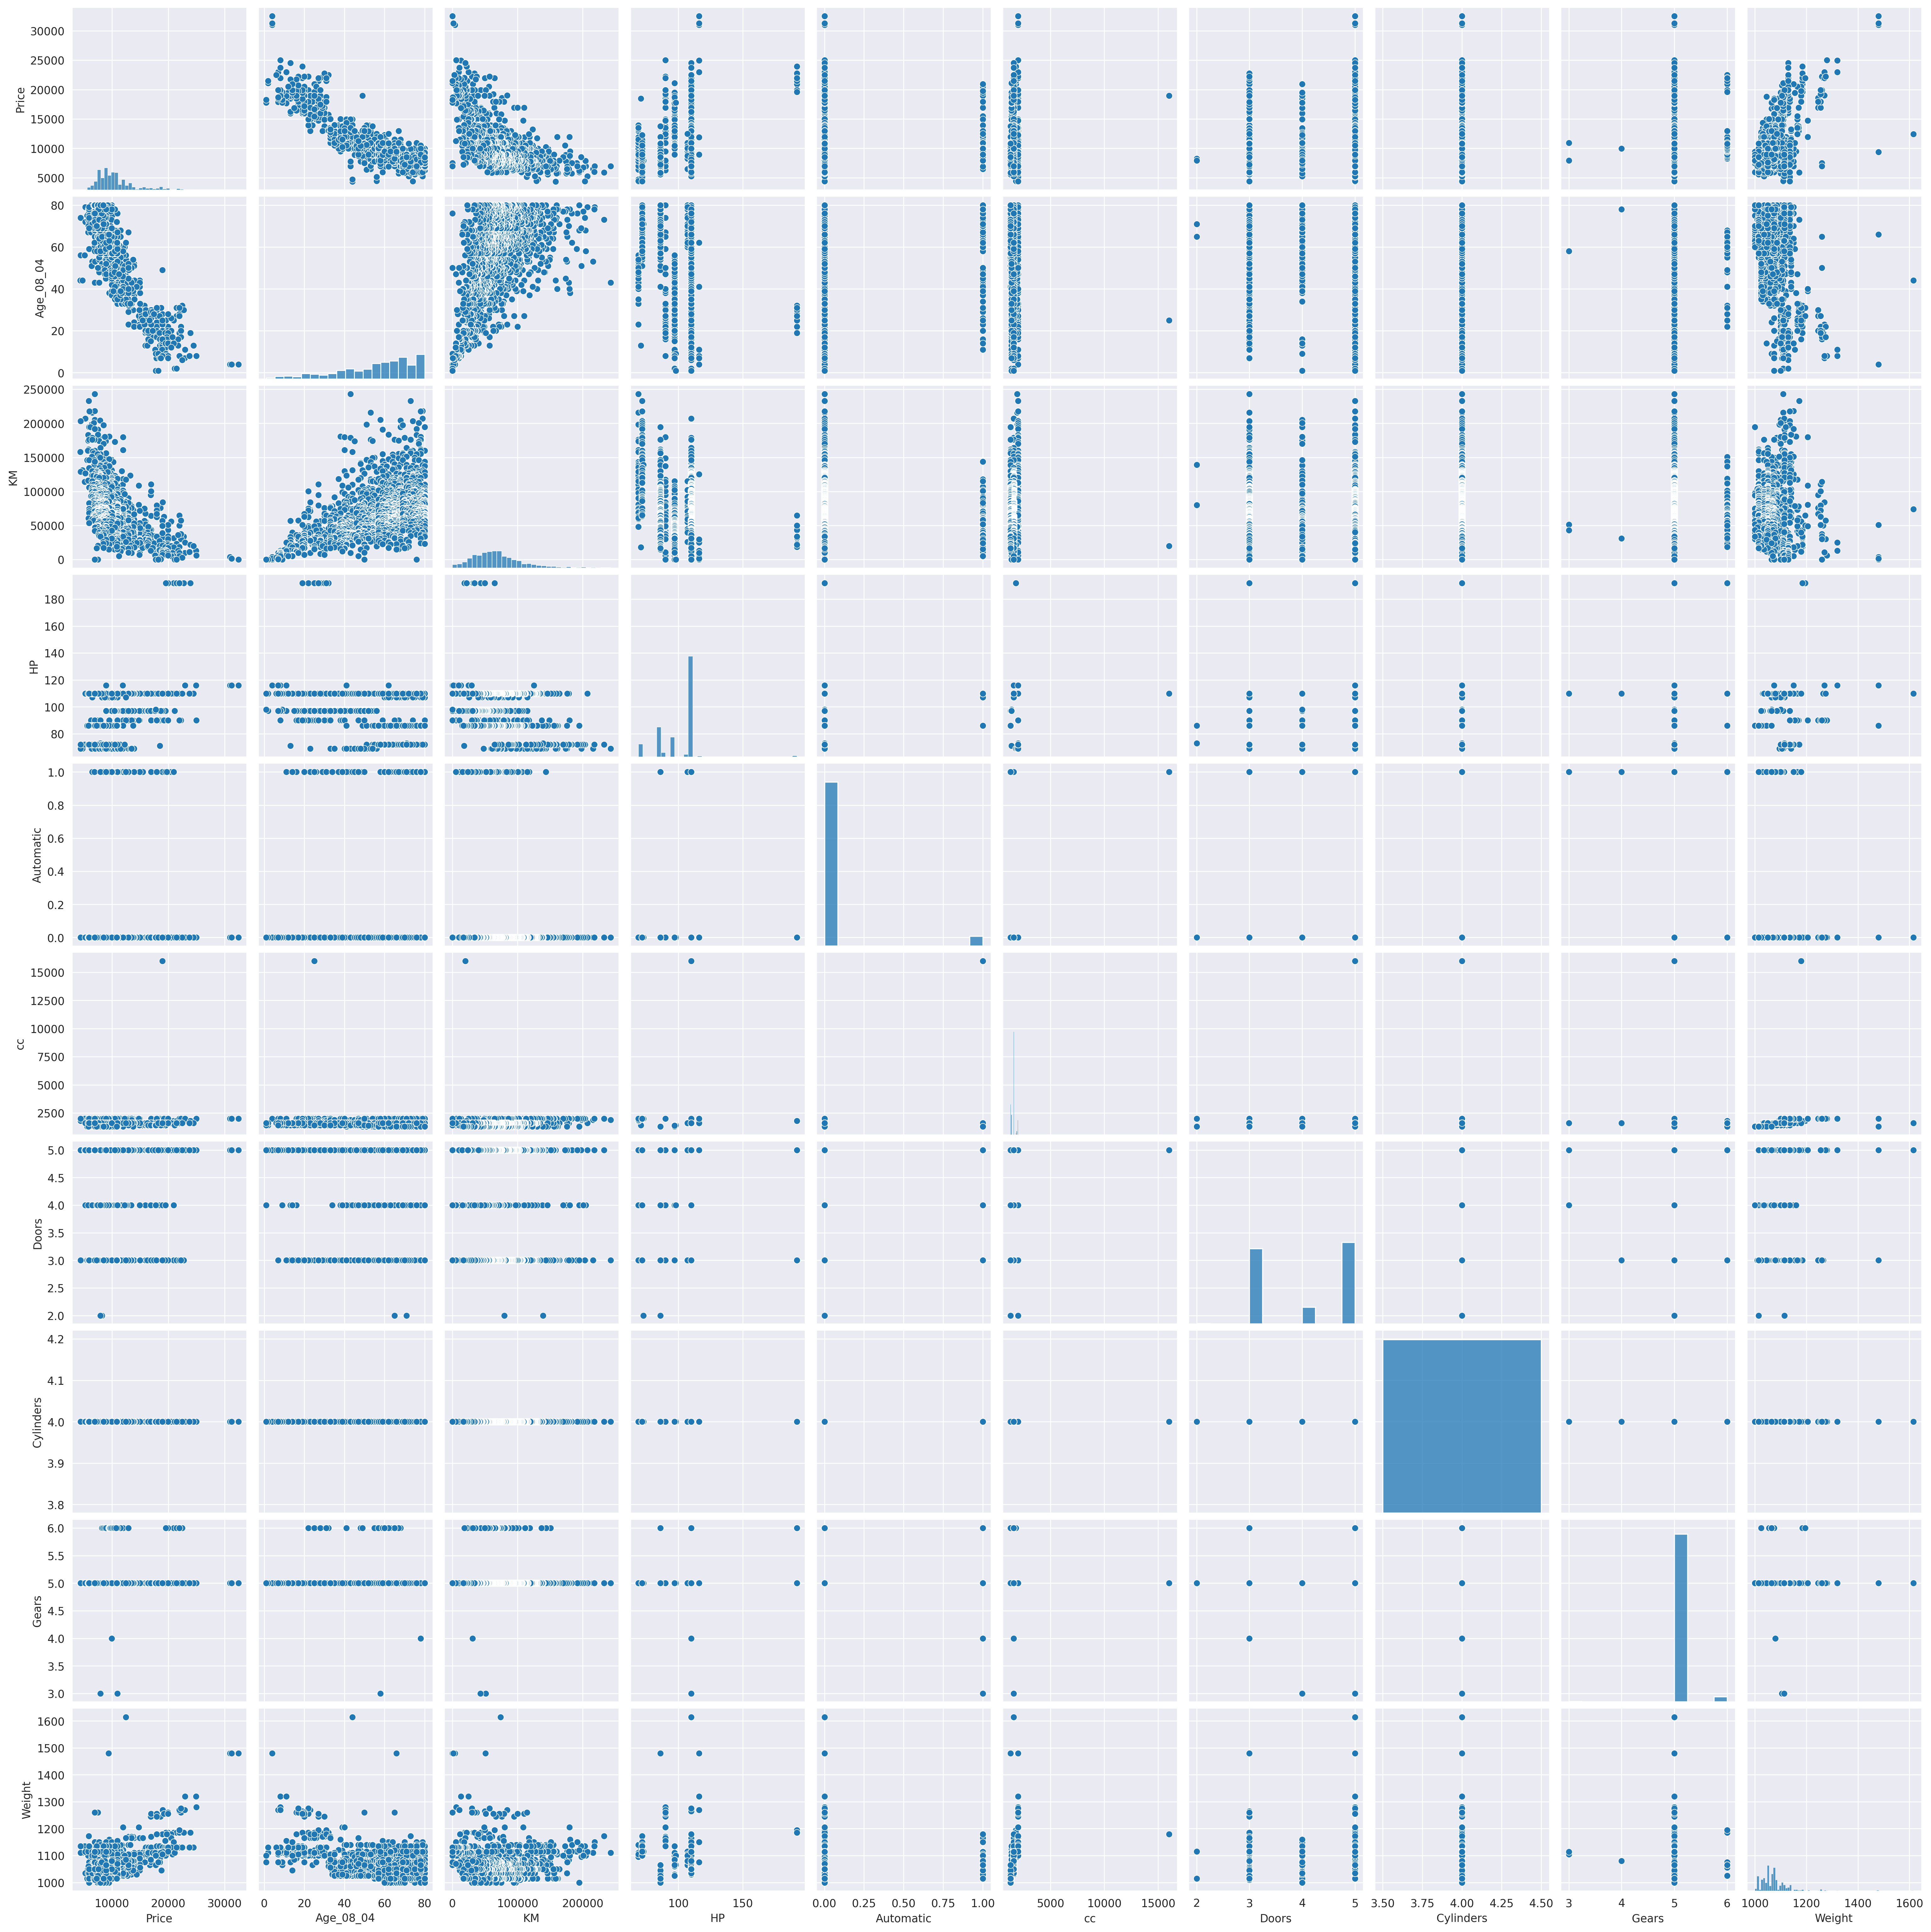

In [ ]:
sns.pairplot(df)

<Axes: >

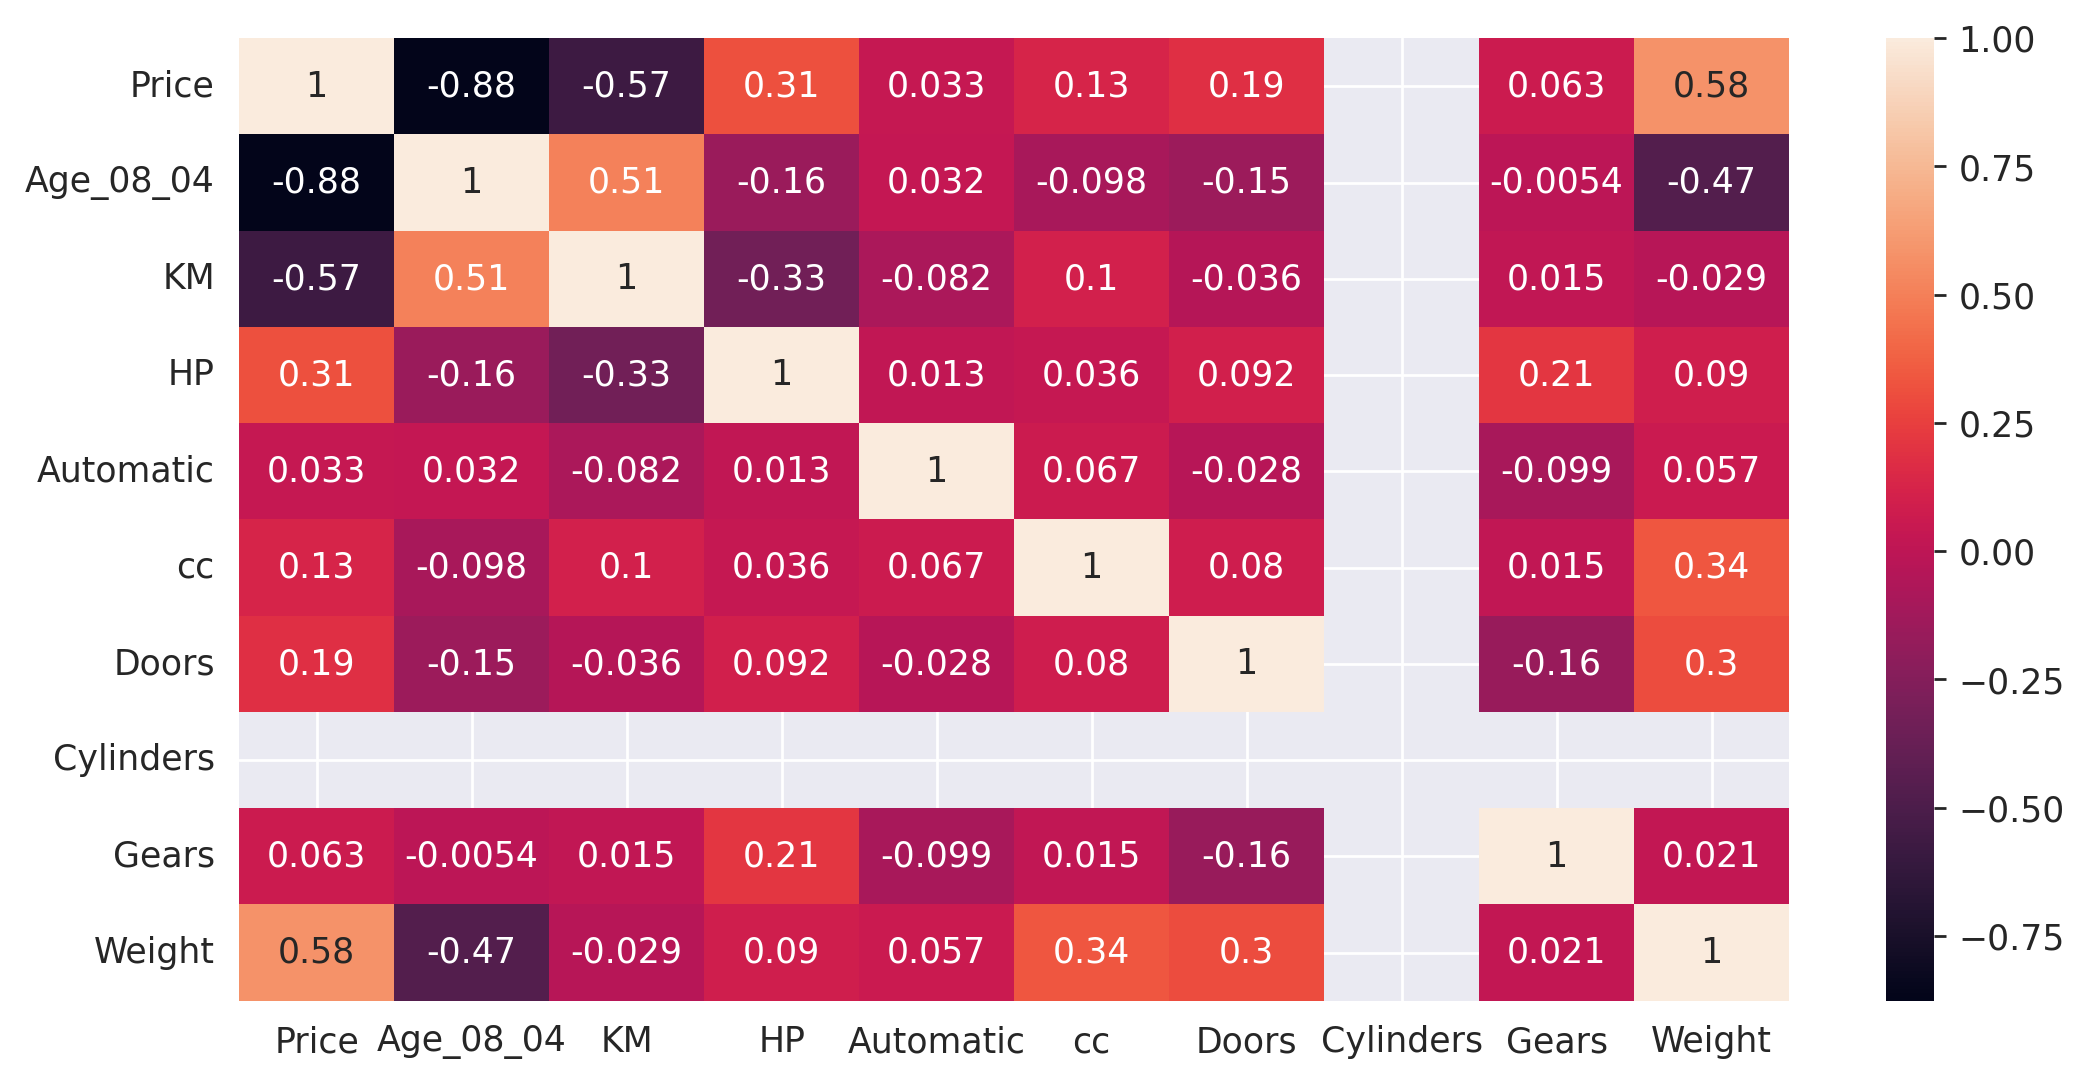

In [ ]:
numeric_df = df.select_dtypes(include='number')


sns.heatmap(numeric_df.corr(), annot=True)

In [ ]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
x =df.drop(columns=['Automatic','cc','Doors','Cylinders','Gears'])
y = df['Price']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

numerical_features = x.select_dtypes(include=['int64', 'float64']).columns
categorical_features = x.select_dtypes(include=['object']).columns

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [ ]:
x_train_preprocessed = preprocessor.fit_transform(x_train)
x_test_preprocessed = preprocessor.transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


def fit_and_evaluate_model(x_train, x_test, y_train, y_test):

    model = LinearRegression()


    model.fit(x_train, y_train)


    y_pred = model.predict(x_test)


    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)


    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("R-squared (R2):", r2)

    return model


print("Model 1 - Using all features:")
model1 = fit_and_evaluate_model(x_train_preprocessed, x_test_preprocessed, y_train, y_test)


Model 1 - Using all features:
Mean Squared Error (MSE): 8.389564476622895e-24
Root Mean Squared Error (RMSE): 2.896474490932536e-12
R-squared (R2): 1.0


In [ ]:
# print("Model 2 - Using selected features:")
#selected_features = ['KM', 'HP', 'Weight']
#x_train_selected = x_train_preprocessed[:, preprocessor.transformers_[0][2]]
#x_test_selected = x_test_preprocessed[:, preprocessor.transformers_[0][2]]
#model2 = fit_and_evaluate_model(x_train_selected, x_test_selected, y_train, y_test)


#print("Model 3 - Using another set of selected features:")
#selected_features = [ 'KM', 'Automatic']
#x_train_selected = x_train_preprocessed[:, preprocessor.transformers_[0][2] + preprocessor.transformers_[1][2]]
#x_test_selected = x_test_preprocessed[:, preprocessor.transformers_[0][2] + preprocessor.transformers_[1][2]]
#model3 = fit_and_evaluate_model(x_train_selected, x_test_selected, y_train, y_test)


In [ ]:
# Evaluate Model 1 (using all features)
print("Model 1 - Using all features:")
fit_and_evaluate_model(x_train_preprocessed, x_test_preprocessed, y_train, y_test)


Model 1 - Using all features:
Mean Squared Error (MSE): 8.389564476622895e-24
Root Mean Squared Error (RMSE): 2.896474490932536e-12
R-squared (R2): 1.0


LinearRegression()

In [ ]:
from sklearn.linear_model import LassoCV

# Fit Lasso regression model
lasso_model = LassoCV(cv=5)
lasso_model.fit(x_train_preprocessed, y_train)

# Evaluate Lasso model
lasso_mse = mean_squared_error(y_test, lasso_model.predict(x_test_preprocessed))
lasso_rmse = lasso_mse ** 0.5
lasso_r2 = lasso_model.score(x_test_preprocessed, y_test)

print("Lasso Regression:")
print("Mean Squared Error (MSE):", lasso_mse)
print("Root Mean Squared Error (RMSE):", lasso_rmse)
print("R-squared (R2):", lasso_r2)


Lasso Regression:
Mean Squared Error (MSE): 13.356601536938614
Root Mean Squared Error (RMSE): 3.6546684578684583
R-squared (R2): 0.9999989989647822


In [ ]:
from sklearn.linear_model import RidgeCV

# Fit Ridge regression model
ridge_model = RidgeCV(cv=5)
ridge_model.fit(x_train_preprocessed, y_train)

# Evaluate Ridge model
ridge_mse = mean_squared_error(y_test, ridge_model.predict(x_test_preprocessed))
ridge_rmse = ridge_mse ** 0.5
ridge_r2 = ridge_model.score(x_test_preprocessed, y_test)

print("\nRidge Regression:")
print("Mean Squared Error (MSE):", ridge_mse)
print("Root Mean Squared Error (RMSE):", ridge_rmse)
print("R-squared (R2):", ridge_r2)



Ridge Regression:
Mean Squared Error (MSE): 0.9767918524161056
Root Mean Squared Error (RMSE): 0.9883278061534572
R-squared (R2): 0.9999999267925271


In [ ]:
test = pd.DataFrame({
    'Age_08_04':[23,29,27],
    'KM':[39787,34423,45000],
    'HP':[90,111,98],
    'Weights':[1165,1170,1160]
})

In [ ]:
test

,Age_08_04,KM,HP,Weights
0,23,39787,90,1165
1,29,34423,111,1170
2,27,45000,98,1160
